In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citi_data = pd.read_csv("./data/city_data.csv")
ride_data = pd.read_csv("./data/ride_data.csv")

# Combine the data into a single dataset
pyber_df = pd.DataFrame.merge(ride_data,citi_data, on = 'city' , how = 'left')

# Display the data table for preview
pyber_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

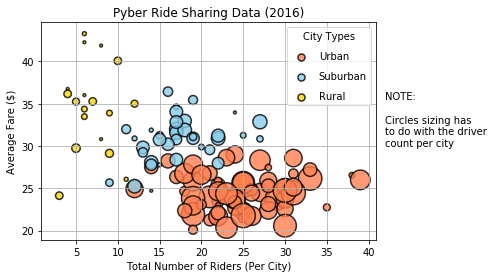

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_type = pyber_df[pyber_df["type"] == "Urban"]
suburban_type = pyber_df[pyber_df["type"] == "Suburban"]
rural_type = pyber_df[pyber_df["type"] == "Rural"]

urban_ride_count = urban_type.groupby(['city']).count()['ride_id']
urban_fare_avg = urban_type.groupby(['city']).mean()['fare']
urban_driver_count = urban_type.groupby(['city']).mean()['driver_count']

suburban_ride_count = suburban_type.groupby(['city']).count()['ride_id']
suburban_fare_avg = suburban_type.groupby(['city']).mean()['fare']
suburban_driver_count = suburban_type.groupby(['city']).mean()['driver_count']

rural_ride_count = rural_type.groupby(['city']).count()['ride_id']
rural_fare_avg = rural_type.groupby(['city']).mean()['fare']
rural_driver_count = rural_type.groupby(['city']).mean()['driver_count']

# Build the scatter plots for each city types

# urban plot

plt.scatter(urban_ride_count, urban_fare_avg, s=8*urban_driver_count, c= "Coral", 
            edgecolor="black", linewidths=1.5, marker="o", alpha=0.8, label="Urban")
# suburban plot
plt.scatter(suburban_ride_count, suburban_fare_avg, s=8*suburban_driver_count, c= "SkyBlue", 
            edgecolor="black", linewidths=1.5, marker="o", alpha=0.8, label="Suburban")
# rural plot
plt.scatter(rural_ride_count, rural_fare_avg, s=8*rural_driver_count, c= "Gold", 
            edgecolor="black", linewidths=1.5, marker="o", alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(True)


# Create a legend
data_legend = plt.legend(loc="upper right",title='City Types',labelspacing=1)
data_legend.legendHandles[0]._sizes = [50]
data_legend.legendHandles[1]._sizes = [50]
data_legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42, 30,"NOTE:\n\nCircles sizing has\nto do with the driver\ncount per city")

# Save Figure

plt.savefig('figure1.png',bbox_inches='tight')

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

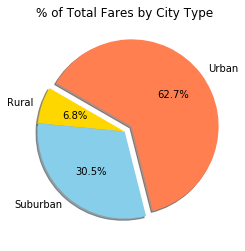

In [4]:
# Calculate Type Percents
total_type = pyber_df.groupby(['type'])['fare'].sum()


# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ['Gold','SkyBlue',"Coral"]
explode = (0,0, 0.1)


plt.pie(total_type, explode=explode, labels=labels, colors=colors, shadow = True,
        autopct="%1.1f%%", startangle=150)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig('figure2.png')

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

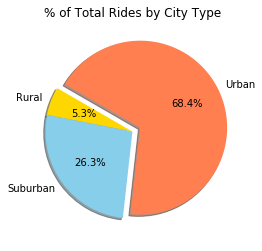

In [6]:
# Calculate Ride Percents
ride_percents = pyber_df.groupby(['type'])['ride_id'].count()
ride_percents

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ['Gold','SkyBlue',"Coral"]
explode = (0,0, 0.1)


plt.pie(ride_percents, explode=explode, labels=labels, colors=colors, shadow = True,
        autopct="%1.1f%%", startangle=150)

plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig('figure3.png')

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

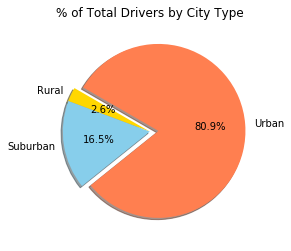

In [8]:
# Calculate Driver Percents

new_df = pd.DataFrame(citi_data)
total_driver_count = new_df["driver_count"].sum()
combined_data_new_df = new_df.groupby(["type"])
group_count = combined_data_new_df["driver_count"].sum()
total_driver = group_count / total_driver_count

# Build Pie Charts
explode = (0,0,0.1)
labels = ["Rural","Suburban","Urban" ]
colors = ['Gold','SkyBlue',"Coral"]
plt.pie(total_driver, explode=explode, labels=labels, colors=colors, shadow = True,
        autopct="%1.1f%%", startangle=150)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig('figure4.png')

In [9]:
# Show Figure
plt.show()